In [1]:
import os
import torch
import numpy as np

#from CODE.AttentionDCA_python.src.plot_functions import contact_plot
from CODE.AttentionDCA_python.src.dcascore import score

from CODE.AttentionDCA_python.src.model_sep_size_heads import MultiDomainAttentionSubBlock

cwd = os.getcwd()
print(cwd)

filename = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_concatenated_nodupli.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA


In [2]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor

## ONLY DOMAIN 1 evaluation ##

In [ ]:
loss_type = 'without_J'

family =  'HK_alone_nomasks_but_with_new_NEW_model_sep_optimizer_newreg_withHKRRfasta'
family ='RR_alone_nomasks_but_with_new_NEW_model_sep_optimizer_newreg_withHKRRfasta'
H = 34
d= 23
H1 = 32
H2 = 33
N = 64
q = 22
domain1_end = 63

device = 'cpu'
n_epochs = 400
K32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

model = MultiDomainAttentionSubBlock(
        H=H, d=d, N=N, q=q,
        domain1_end=domain1_end,
        
        H1 = H1,H2=H2
    ).to(device)
model.Q1.data = Q32_23_w_mask
model.K1.data = K32_23_w_mask
model.V1.data = V32_23_w_mask


/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Q1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.K1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:87: UserWarning: To copy construct from a tensor, it is recomme

In [28]:
loss_type = 'without_J'


family ='HK_alone_nomasks_but_with_new_NEW_model_sep_optimizer_newreg_withHKRRfasta'
H = 34
d= 23
H1 = 32
H2 = 33
N = 176
q = 22
domain1_end = 63

device = 'cpu'
n_epochs = 400
K32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

model = MultiDomainAttentionSubBlock(
        H=H, d=d, N=N, q=q,
        domain1_end=domain1_end,
        
        H1 = H1,H2=H2
    ).to(device)
model.Q1.data = Q32_23_w_mask
model.K1.data = K32_23_w_mask
model.V1.data = V32_23_w_mask


/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Q1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.K1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:87: UserWarning: To copy construct from a tensor, it is recomme

64


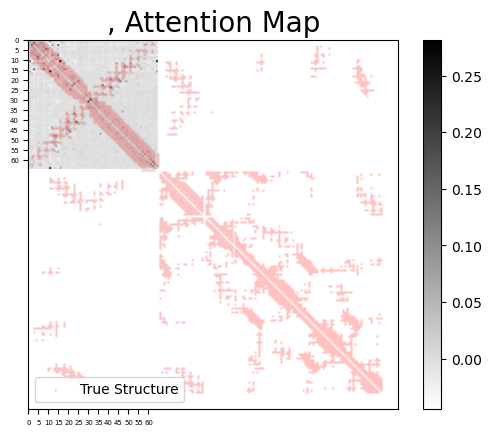

In [29]:
from CODE.AttentionDCA_python.src.dcascore import correct_APC
from CODE.AttentionDCA_python.src.new_plot_functions import true_structure
import matplotlib.pyplot as plt



def compute_e_sel_subblock(model, head_idx, domain='domain1'):
    """
    Compute the raw attention logits e_sel for a single head in the given domain block.
    domain ∈ {'domain1', 'domain2', 'inter'}

    Returns: e_sel (logits) as a 2D matrix
      - domain1 => shape (L1, L1)
      - domain2 => shape (L2, L2)
      - inter   => shape (L1, L2)
    """
    Q = model.Q1[head_idx]  # shape (d, N)
    K = model.K1[head_idx]  # shape (d, N)

    L1 = model.N_alpha
    L2 = model.N_beta
    start2 = model.domain2_start

    if domain == 'domain1':
        # Q_sel, K_sel => shape (d, L1)
        Q_sel = Q[:, :L1]
        K_sel = K[:, :L1]
        # e_sel => (L1, L1)
        e_sel = torch.einsum('di,dj->ij', Q_sel, K_sel)



    return e_sel
L1 = 64
k = 1000
A = torch.zeros(model.H1, L1, L1, device=device)

N = A.shape[1]
for h in range(0, model.H1):
    e_sel = compute_e_sel_subblock(model, h, domain='domain1')
    # e_sel: (L1,L1)
    sf = torch.nn.functional.softmax(e_sel, dim=1)
    A[h, 0:L1, 0:L1] = sf
    A[h, 0:L1, 0:L1].fill_diagonal_(0)
if True:
    A = A * A  # Element-wise square
    
if k >= N * (N - 1) / 2:
         M = torch.mean(A, dim=0)  # Shape: (N, N)


_A = torch.zeros(H1, L1, L1, device=A.device, dtype=A.dtype)
    
for h in range(H1):
    # Flatten the h-th attention matrix
    A_h = A[h].flatten()  # Shape: (N*N,)
    
    # Get top-k values and their indices
    vmins, idxs = torch.topk(A_h, k, largest=True, sorted=False)  # Shape: (k,)
    
    # Convert flat indices to 2D indices
    i_indices = idxs // N
    j_indices = idxs % N
    
    # Assign the top-k values to _A
    _A[h, i_indices, j_indices] = vmins



sum_A = _A.sum(dim=0)  # Shape: (N, N)
count_A = (_A != 0).sum(dim=0)  # Shape: (N, N)
M = torch.zeros(L1, L1, device=A.device, dtype=A.dtype)
mask = count_A > 0
M[mask] = sum_A[mask] / count_A[mask]
    

M = (M + M.transpose(0, 1)) / 2  # Symmetrize

M = correct_APC(M)


ticks = np.arange(0, N, 5)
print(N)
ms = 100 / N
# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting
Am = M.cpu().detach().numpy()

# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting
Am = M.cpu().detach().numpy()
#print(Am)

# Display the Attention Map
plt.imshow(Am, cmap='gray_r')#, aspect='auto')
plt.colorbar()#(shrink=0.7, aspect=10)
# Retrieve and adjust true structure coordinates


if structfile is not None:
    dist = true_structure(structfile, min_separation=0, cutoff=8.0)
    if dist.size != 0:
        plt.scatter((dist[0] - 1), (dist[1] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms, label='True Structure')
        plt.scatter((dist[1] - 1), (dist[0] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms)



# Set axis ticks and labels
plt.xticks(ticks - 1, ticks, fontsize=5)
plt.yticks(ticks - 1, ticks, fontsize=5)
# Set plot title
plt.title(f", Attention Map", fontsize=20)
#save the image
#plt.savefig(f"AttentionMap_{PFname}_mean.pdf")
# Add colorbar with specified shrink and aspect

# Add legend
plt.legend()
plt.show()
    

## ONLY DOMAIN 2 evaluation ##

In [ ]:
loss_type = 'without_J'


family ='RR_alone_nomasks_but_with_new_NEW_model_sep_optimizer_newreg_withHKRRfasta'
H = 34
d= 23
H1 = 1
H2 = 33
N = 176
q = 22
domain1_end = 63

device = 'cpu'
n_epochs = 400
K32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

model = MultiDomainAttentionSubBlock(
        H=H, d=d, N=N, q=q,
        domain1_end=domain1_end,
        
        H1 = H1,H2=H2
    ).to(device)
model.Q2.data = Q32_23_w_mask
model.K2.data = K32_23_w_mask
model.V2.data = V32_23_w_mask


/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Q1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.K1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:87: UserWarning: To copy construct from a tensor, it is recomme

In [37]:
model.Q2.data.shape

torch.Size([32, 23, 112])

176


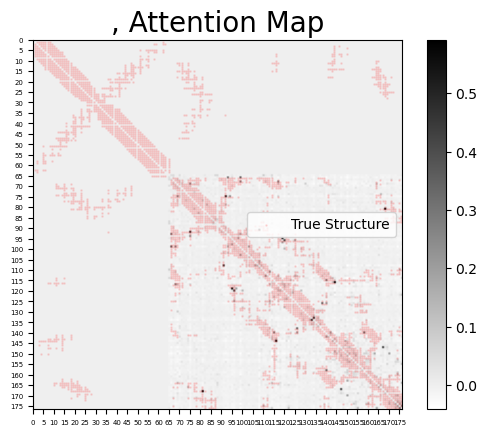

In [ ]:
from CODE.AttentionDCA_python.src.dcascore import correct_APC
from CODE.AttentionDCA_python.src.new_plot_functions import true_structure
import matplotlib.pyplot as plt




L1 = 64
L2 = 176 - 64
k = 1000
domain2_start = model.domain2_start
A = torch.zeros(model.H2-model.H1, L2, L2, device=device)

#N = A.shape[1]
for h in range(model.H1, model.H2):
    local_idx = h - model.H1
    Q_sel = model.Q2[local_idx]  # shape (d, L2)
    K_sel = model.K2[local_idx]  # shape (d, L2)
    e_sel = torch.einsum('di,dj->ij', Q_sel, K_sel)  # (L2, L2)
    sf = torch.nn.functional.softmax(e_sel, dim=1)

    A[local_idx, :, :] = sf
    A[local_idx, :, :].fill_diagonal_(0)
if True:
    A = A * A  # Element-wise square
    
if k >= N * (N - 1) / 2:
         M = torch.mean(A, dim=0)  # Shape: (N, N)


_A = torch.zeros(model.H2-model.H1, L2, L2, device=device)
    
for h in range(model.H1, model.H2):
    # Flatten the h-th attention matrix
    local_idx = h - model.H1
    A_h = A[local_idx].flatten()  # Shape: (N*N,)
    
    # Get top-k values and their indices
    vmins, idxs = torch.topk(A_h, k, largest=True, sorted=False)  # Shape: (k,)
    
    # Convert flat indices to 2D indices
    i_indices = idxs // L2
    j_indices = idxs % L2
    
    # Assign the top-k values to _A
    _A[local_idx, i_indices, j_indices] = vmins



sum_A = _A.sum(dim=0)  # Shape: (N, N)
count_A = (_A != 0).sum(dim=0)  # Shape: (N, N)
M = torch.zeros(L2, L2, device=A.device, dtype=A.dtype)
mask = count_A > 0
M[mask] = sum_A[mask] / count_A[mask]
    

M = (M + M.transpose(0, 1)) / 2  # Symmetrize

M = correct_APC(M)


ticks = np.arange(0, N, 5)
print(N)
ms = 100 / L2
# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting
Am = M.cpu().detach().numpy()

# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting

#print(Am)


# Create the top-left zero block
bottom_left = torch.zeros(
    N - 64, 
    64,
    device=device
)
# top and bottom
top = torch.zeros(64, N, device=device)
type(bottom_left)
bottom = torch.cat([bottom_left, M], dim=1)
new_Am =  torch.cat([top, bottom], dim=0)

Am = new_Am.cpu().detach().numpy()

# Display the Attention Map
plt.imshow(Am, cmap='gray_r')#, aspect='auto')
plt.colorbar()#(shrink=0.7, aspect=10)
# Retrieve and adjust true structure coordinates


if structfile is not None:
    dist = true_structure(structfile, min_separation=0, cutoff=8.0)
    if dist.size != 0:
        plt.scatter((dist[0] - 1), (dist[1] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms, label='True Structure')
        plt.scatter((dist[1] - 1), (dist[0] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms)



# Set axis ticks and labels
plt.xticks(ticks - 1, ticks, fontsize=5)
plt.yticks(ticks - 1, ticks, fontsize=5)
# Set plot title
plt.title(f"Attention Map", fontsize=20)
#save the image
#plt.savefig(f"AttentionMap_{PFname}_mean.pdf")
# Add colorbar with specified shrink and aspect

# Add legend
plt.legend()
plt.show()
    

## DOMAIN 1 AND 2 ##

In [56]:
loss_type = 'without_J'


family ='HKRR_nointer_alone_nomasks_but_with_new_NEW_model_sep_optimizer_newreg_withHKRRfasta'
H = 65
d= 23
H1 = 32
H2 = 64
N = 176
q = 22
domain1_end = 63

device = 'cpu'
n_epochs = 400
K32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V2_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

model = MultiDomainAttentionSubBlock(
        H=H, d=d, N=N, q=q,
        domain1_end=domain1_end,
        
        H1 = H1,H2=H2
    ).to(device)
model.Q2.data = Q32_23_w_mask
model.K2.data = K32_23_w_mask
model.V2.data = V32_23_w_mask

K32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V1_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

model.Q1.data = Q32_23_w_mask
model.K1.data = K32_23_w_mask
model.V1.data = V32_23_w_mask


/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Q1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.K1 = nn.Parameter(torch.tensor(torch.randn(H1, d, self.N_alpha), device=self.device))
/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/model_sep_size_heads.py:87: UserWarning: To copy construct from a tensor, it is recomme

176


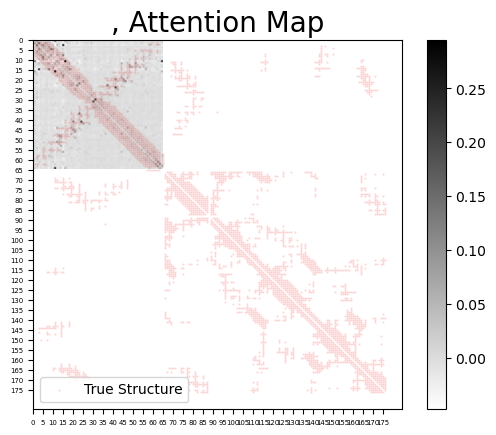

In [57]:
from CODE.AttentionDCA_python.src.dcascore import correct_APC
from CODE.AttentionDCA_python.src.new_plot_functions import true_structure
import matplotlib.pyplot as plt



def compute_e_sel_subblock(model, head_idx, domain='domain1'):
    """
    Compute the raw attention logits e_sel for a single head in the given domain block.
    domain ∈ {'domain1', 'domain2', 'inter'}

    Returns: e_sel (logits) as a 2D matrix
      - domain1 => shape (L1, L1)
      - domain2 => shape (L2, L2)
      - inter   => shape (L1, L2)
    """
    Q = model.Q1[head_idx]  # shape (d, N)
    K = model.K1[head_idx]  # shape (d, N)

    L1 = model.N_alpha
    L2 = model.N_beta
    start2 = model.domain2_start

    if domain == 'domain1':
        # Q_sel, K_sel => shape (d, L1)
        Q_sel = Q[:, :L1]
        K_sel = K[:, :L1]
        # e_sel => (L1, L1)
        e_sel = torch.einsum('di,dj->ij', Q_sel, K_sel)



    return e_sel
L1 = 64
k = 1000
A = torch.zeros(model.H1, L1, L1, device=device)

L1 = A.shape[1]
for h in range(0, model.H1):
    e_sel = compute_e_sel_subblock(model, h, domain='domain1')
    # e_sel: (L1,L1)
    sf = torch.nn.functional.softmax(e_sel, dim=1)
    A[h, 0:L1, 0:L1] = sf
    A[h, 0:L1, 0:L1].fill_diagonal_(0)
if True:
    A = A * A  # Element-wise square
    
if k >= N * (N - 1) / 2:
         M = torch.mean(A, dim=0)  # Shape: (N, N)


_A = torch.zeros(H1, L1, L1, device=A.device, dtype=A.dtype)
    
for h in range(H1):
    # Flatten the h-th attention matrix
    A_h = A[h].flatten()  # Shape: (N*N,)
    
    # Get top-k values and their indices
    vmins, idxs = torch.topk(A_h, k, largest=True, sorted=False)  # Shape: (k,)
    
    # Convert flat indices to 2D indices
    i_indices = idxs // L1
    j_indices = idxs % L1
    
    # Assign the top-k values to _A
    _A[h, i_indices, j_indices] = vmins



sum_A = _A.sum(dim=0)  # Shape: (N, N)
count_A = (_A != 0).sum(dim=0)  # Shape: (N, N)
M = torch.zeros(L1, L1, device=A.device, dtype=A.dtype)
mask = count_A > 0
M[mask] = sum_A[mask] / count_A[mask]
    

M = (M + M.transpose(0, 1)) / 2  # Symmetrize

M = correct_APC(M)


ticks = np.arange(0, N, 5)
print(N)
ms = 100 / N
# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting
Am = M.cpu().detach().numpy()

# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting
Am = M.cpu().detach().numpy()
#print(Am)

# Display the Attention Map
plt.imshow(Am, cmap='gray_r')#, aspect='auto')
plt.colorbar()#(shrink=0.7, aspect=10)
# Retrieve and adjust true structure coordinates


if structfile is not None:
    dist = true_structure(structfile, min_separation=0, cutoff=8.0)
    if dist.size != 0:
        plt.scatter((dist[0] - 1), (dist[1] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms, label='True Structure')
        plt.scatter((dist[1] - 1), (dist[0] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms)



# Set axis ticks and labels
plt.xticks(ticks - 1, ticks, fontsize=5)
plt.yticks(ticks - 1, ticks, fontsize=5)
# Set plot title
plt.title(f", Attention Map", fontsize=20)
#save the image
#plt.savefig(f"AttentionMap_{PFname}_mean.pdf")
# Add colorbar with specified shrink and aspect

# Add legend
plt.legend()
plt.show()
    

In [54]:
model.Q2.data.shape

torch.Size([32, 23, 112])

176


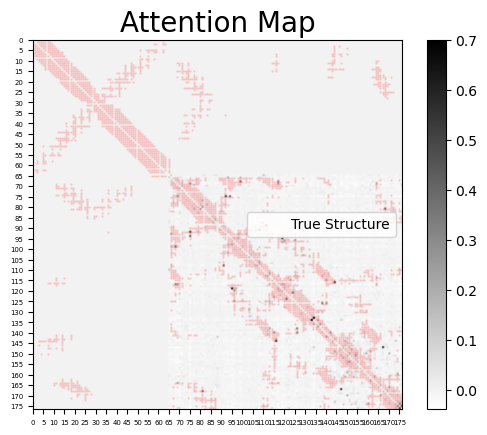

In [55]:
from CODE.AttentionDCA_python.src.dcascore import correct_APC
from CODE.AttentionDCA_python.src.new_plot_functions import true_structure
import matplotlib.pyplot as plt




L1 = 64
L2 = 176 - 64
k = 1000
domain2_start = model.domain2_start
A = torch.zeros(model.H2-model.H1, L2, L2, device=device)

#N = A.shape[1]
for h in range(model.H1, model.H2):
    local_idx = h - model.H1
    Q_sel = model.Q2[local_idx]  # shape (d, L2)
    K_sel = model.K2[local_idx]  # shape (d, L2)
    e_sel = torch.einsum('di,dj->ij', Q_sel, K_sel)  # (L2, L2)
    sf = torch.nn.functional.softmax(e_sel, dim=1)

    A[local_idx, :, :] = sf
    A[local_idx, :, :].fill_diagonal_(0)
if True:
    A = A * A  # Element-wise square
    
if k >= N * (N - 1) / 2:
         M = torch.mean(A, dim=0)  # Shape: (N, N)


_A = torch.zeros(model.H2-model.H1, L2, L2, device=device)
    
for h in range(model.H1, model.H2):
    # Flatten the h-th attention matrix
    local_idx = h - model.H1
    A_h = A[local_idx].flatten()  # Shape: (N*N,)
    
    # Get top-k values and their indices
    vmins, idxs = torch.topk(A_h, k, largest=True, sorted=False)  # Shape: (k,)
    
    # Convert flat indices to 2D indices
    i_indices = idxs // L2
    j_indices = idxs % L2
    
    # Assign the top-k values to _A
    _A[local_idx, i_indices, j_indices] = vmins



sum_A = _A.sum(dim=0)  # Shape: (N, N)
count_A = (_A != 0).sum(dim=0)  # Shape: (N, N)
M = torch.zeros(L2, L2, device=A.device, dtype=A.dtype)
mask = count_A > 0
M[mask] = sum_A[mask] / count_A[mask]
    

M = (M + M.transpose(0, 1)) / 2  # Symmetrize

M = correct_APC(M)


ticks = np.arange(0, N, 5)
print(N)
ms = 100 / L2
# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting
Am = M.cpu().detach().numpy()

# Replace diagonal elements with the mean of M
mean_M = torch.mean(M)
for i in range(M.size(0)):
    M[i, i] = mean_M

# Convert M to NumPy for plotting

#print(Am)


# Create the top-left zero block
bottom_left = torch.zeros(
    N - 64, 
    64,
    device=device
)
# top and bottom
top = torch.zeros(64, N, device=device)
type(bottom_left)
bottom = torch.cat([bottom_left, M], dim=1)
new_Am =  torch.cat([top, bottom], dim=0)

Am = new_Am.cpu().detach().numpy()

# Display the Attention Map
plt.imshow(Am, cmap='gray_r')#, aspect='auto')
plt.colorbar()#(shrink=0.7, aspect=10)
# Retrieve and adjust true structure coordinates


if structfile is not None:
    dist = true_structure(structfile, min_separation=0, cutoff=8.0)
    if dist.size != 0:
        plt.scatter((dist[0] - 1), (dist[1] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms, label='True Structure')
        plt.scatter((dist[1] - 1), (dist[0] - 1), 
                    c='r', marker='o', alpha=0.1, s=ms)



# Set axis ticks and labels
plt.xticks(ticks - 1, ticks, fontsize=5)
plt.yticks(ticks - 1, ticks, fontsize=5)
# Set plot title
plt.title(f"Attention Map", fontsize=20)
#save the image
#plt.savefig(f"AttentionMap_{PFname}_mean.pdf")
# Add colorbar with specified shrink and aspect

# Add legend
plt.legend()
plt.show()
    

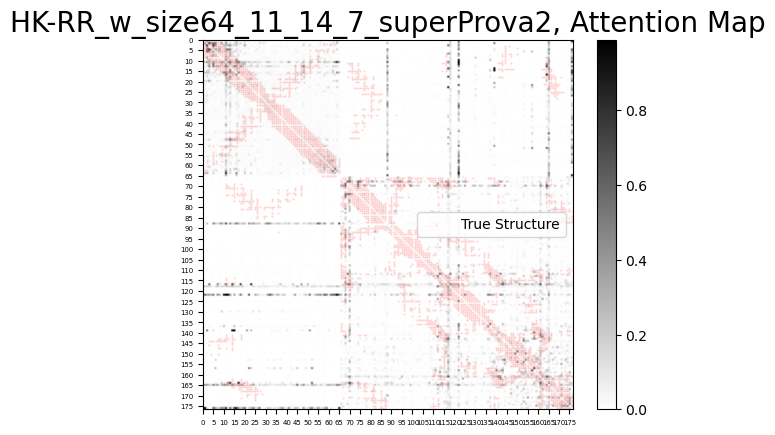

In [25]:
from CODE.AttentionDCA_python.src.plot_functions_sep_size import assemble_full_attention_map, k_matrix_precomputed, graphAtt_precomputed
# Suppose 'model' is your trained MultiDomainAttentionSubBlock:
full_A = assemble_full_attention_map(model)  # (H,N,N)
M, Ax = k_matrix_precomputed(full_A, k=1000, version='mean', sym=True, APC=False, sqr=False)
ticks = np.arange(0, 176, 5)  # Example tick positions
PFname = 'HK-RR_w_size64_11_14_7_superProva2'
# or pass it to `graphAtt` if that function also can skip the Q,K,V -> A step.
filestruct = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'
graphAtt_precomputed(M, Ax , filestruct, PFname, ticks, k=None, version='mean', sqr=False, APC=True, all = False)





In [11]:

ranking32_23, _ = score(Q32_23_w_mask, K32_23_w_mask, V32_23_w_mask, separation_heads= 64, H1 =22, H2=26, A = Ax)

176


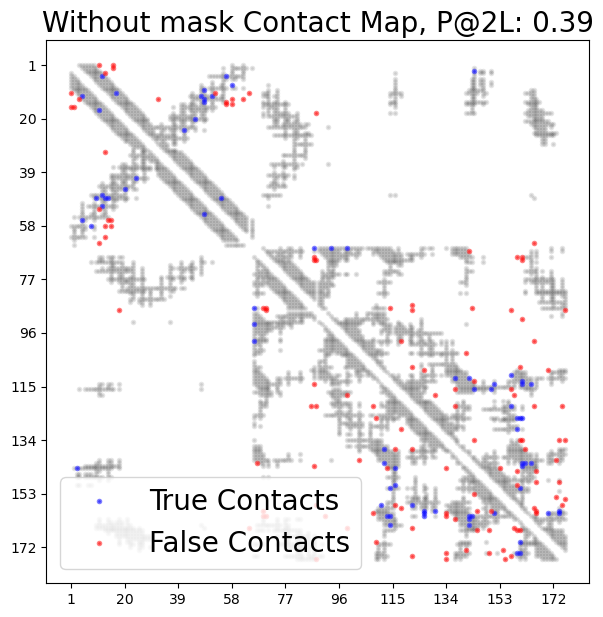

In [12]:
N = 176
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake32_23_wo_mask = contact_plot(ranking32_23, filestruct, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")